In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
data = pd.read_csv('data/kc_house_data.csv')

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [5]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [6]:
data.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [7]:
data.dropna(subset=['heat_source', 'sewer_system'], inplace=True)
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [8]:
data = pd.get_dummies(data, columns=['waterfront', 'nuisance', 'greenbelt', 'condition', 'grade', 'heat_source', 'sewer_system'], drop_first=True)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,...,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NONE,1180,...,0,0,1,0,0,0,0,0,1,0
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,AVERAGE,1570,...,0,0,0,0,1,0,0,0,1,0
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,AVERAGE,1580,...,0,0,1,0,0,0,0,0,1,0
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,AVERAGE,1090,...,1,0,1,0,0,0,0,0,1,0
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NONE,1120,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NONE,1600,...,0,0,0,0,1,0,0,0,1,0
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,FAIR,2020,...,0,0,1,0,0,0,0,0,1,0
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NONE,940,...,0,0,1,0,0,0,0,0,1,0
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NONE,1830,...,0,0,1,0,0,0,0,0,1,0


In [9]:
corr_with_price = data.corr()['price'].sort_values(ascending=False)
print(corr_with_price)


price                              1.000000
sqft_living                        0.608616
sqft_above                         0.538631
bathrooms                          0.480337
grade_11 Excellent                 0.317322
sqft_patio                         0.313789
bedrooms                           0.288954
grade_12 Luxury                    0.283093
sqft_garage                        0.263674
sqft_basement                      0.245005
waterfront_YES                     0.235074
grade_9 Better                     0.202460
grade_13 Mansion                   0.198162
floors                             0.180589
heat_source_Gas                    0.142218
yr_built                           0.095796
sqft_lot                           0.086550
yr_renovated                       0.085023
greenbelt_YES                      0.067936
lat                                0.063430
heat_source_Gas/Solar              0.036678
sewer_system_PUBLIC                0.021186
nuisance_YES                    

<ipython-input-9-6066569fb328>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_price = data.corr()['price'].sort_values(ascending=False)


In [10]:
# Setting 'y' to target variable 'price'

y = data['price']


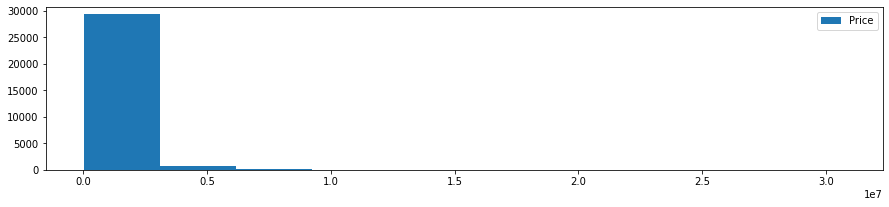

In [11]:
fig, ax = plt.subplots(figsize=(15,3))
ax.hist(y, label="Price")
ax.legend();

In [12]:
# comparing with log-transformed version of 'price'

y_log = np.log(y)
y_log.name = 'Price_log'
y_log

0        13.422468
1        13.732129
2        12.647548
3        13.560618
4        13.292106
           ...    
30150    14.256986
30151    14.087825
30152    13.592367
30153    13.560618
30154    13.122363
Name: Price_log, Length: 30111, dtype: float64

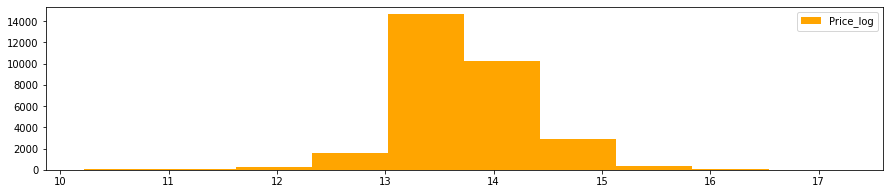

In [13]:
fig, ax = plt.subplots(figsize=(15,3))
ax.hist(y_log, color="orange", label="Price_log")
ax.legend();

In [14]:
data['price_log'] = np.log(data['price'])

In [15]:
cols_to_drop = ['id', 'price', 'date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'address', 'lat', 'long']
data = data.drop(cols_to_drop, axis=1)

In [16]:
data.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_garage', 'sqft_patio', 'yr_built', 'waterfront_YES',
       'nuisance_YES', 'greenbelt_YES', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_2 Substandard',
       'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average',
       'grade_7 Average', 'grade_8 Good', 'grade_9 Better',
       'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'sewer_system_PRIVATE RESTRICTED',
       'sewer_system_PUBLIC', 'sewer_system_PUBLIC RESTRICTED', 'price_log'],
      dtype='object')

In [18]:
y = data['price_log']
x_first = data.drop('price_log', axis=1)

first_model = sm.OLS(y, sm.add_constant(x_first))
first_results = first_model.fit()

print(first_results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     865.6
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:02:10   Log-Likelihood:                -15937.
No. Observations:               30111   AIC:                         3.195e+04
Df Residuals:                   30075   BIC:                         3.225e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


addressing multicollinearity

In [26]:
corr_with_price = data.corr()['price_log'].sort_values(ascending=False)
print(corr_with_price)

price_log                          1.000000
sqft_living                        0.621995
bathrooms                          0.516579
bedrooms                           0.345886
sqft_patio                         0.310324
sqft_garage                        0.284627
grade_9 Better                     0.283096
grade_11 Excellent                 0.243749
floors                             0.234263
heat_source_Gas                    0.183354
grade_12 Luxury                    0.167870
waterfront_YES                     0.138596
yr_built                           0.120331
greenbelt_YES                      0.097182
grade_13 Mansion                   0.086235
sqft_lot                           0.084701
grade_8 Good                       0.068209
heat_source_Gas/Solar              0.036581
sewer_system_PUBLIC                0.032938
condition_Very Good                0.022461
sewer_system_PUBLIC RESTRICTED     0.000534
heat_source_Other                 -0.000429
heat_source_Oil/Solar           

In [27]:
# Define the list of feature correlations to price_log
corr_with_price = {
    'sqft_living': 0.621995,
    'bathrooms': 0.516579,
    'bedrooms': 0.345886,
    'sqft_patio': 0.310324,
    'sqft_garage': 0.284627,
    'grade_9 Better': 0.283096,
    'grade_11 Excellent': 0.243749,
    'floors': 0.234263,
    'heat_source_Gas': 0.183354,
    'grade_12 Luxury': 0.167870,
    'waterfront_YES': 0.138596,
    'yr_built': 0.120331,
    'greenbelt_YES': 0.097182,
    'grade_13 Mansion': 0.086235,
    'sqft_lot': 0.084701,
    'grade_8 Good': 0.068209,
    'heat_source_Gas/Solar': 0.036581,
    'sewer_system_PUBLIC': 0.032938,
    'condition_Very Good': 0.022461,
    'sewer_system_PUBLIC RESTRICTED': 0.000534,
    'heat_source_Other': -0.000429,
    'heat_source_Oil/Solar': -0.001028,
    'nuisance_YES': -0.006308,
    'grade_2 Substandard': -0.008281,
    'heat_source_Electricity/Solar': -0.015481,
    'sewer_system_PRIVATE RESTRICTED': -0.016720,
    'grade_3 Poor': -0.024308,
    'condition_Good': -0.035243,
    'grade_4 Low': -0.043100,
    'condition_Poor': -0.043211,
    'condition_Fair': -0.047832,
    'heat_source_Oil': -0.081581,
    'grade_5 Fair': -0.112954,
    'grade_6 Low Average': -0.262860,
    'grade_7 Average': -0.286620
}

# Find pairs of features with correlation coefficient above 0.6
corr_pairs = []
for i, (feat1, corr1) in enumerate(corr_with_price.items()):
    for feat2, corr2 in list(corr_with_price.items())[i+1:]:
        if abs(corr1 - corr2) > 0.6:
            corr_pairs.append((feat1, feat2, round(corr1, 2), round(corr2, 2)))

# Print the pairs of correlated features
for pair in corr_pairs:
    print(pair)


('sqft_living', 'sewer_system_PUBLIC RESTRICTED', 0.62, 0.0)
('sqft_living', 'heat_source_Other', 0.62, -0.0)
('sqft_living', 'heat_source_Oil/Solar', 0.62, -0.0)
('sqft_living', 'nuisance_YES', 0.62, -0.01)
('sqft_living', 'grade_2 Substandard', 0.62, -0.01)
('sqft_living', 'heat_source_Electricity/Solar', 0.62, -0.02)
('sqft_living', 'sewer_system_PRIVATE RESTRICTED', 0.62, -0.02)
('sqft_living', 'grade_3 Poor', 0.62, -0.02)
('sqft_living', 'condition_Good', 0.62, -0.04)
('sqft_living', 'grade_4 Low', 0.62, -0.04)
('sqft_living', 'condition_Poor', 0.62, -0.04)
('sqft_living', 'condition_Fair', 0.62, -0.05)
('sqft_living', 'heat_source_Oil', 0.62, -0.08)
('sqft_living', 'grade_5 Fair', 0.62, -0.11)
('sqft_living', 'grade_6 Low Average', 0.62, -0.26)
('sqft_living', 'grade_7 Average', 0.62, -0.29)
('bathrooms', 'grade_5 Fair', 0.52, -0.11)
('bathrooms', 'grade_6 Low Average', 0.52, -0.26)
('bathrooms', 'grade_7 Average', 0.52, -0.29)
('bedrooms', 'grade_6 Low Average', 0.35, -0.26)
('b

<Axes: xlabel='sqft_living', ylabel='price_log'>

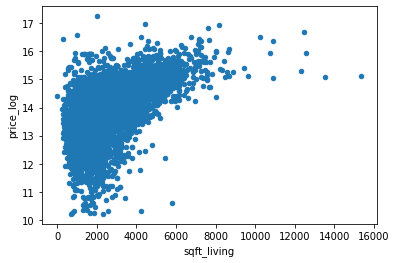

In [23]:
# Creating scatterplot of sqft_living vs price to visualize relationship
data.plot.scatter(x='sqft_living', y='price_log')